In [1]:
from utils import *

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import os

In [3]:
parent_path = "Full Restaurants Generations"
columns = {'Cuisine Type', 'Dietary Options', 'Restaurant Style', 'Atmosphere'
for filename in os.listdir(parent_path):
    generation = pd.read_csv(parent_path+generation)
        

dining_generated_df_1000_chunk_4.csv
dining_generated_df_1000_chunk_35.csv
dining_generated_df_1000_chunk_45.csv
dining_generated_df_1000_chunk_36.csv
dining_generated_df_1000_chunk_54.csv
dining_generated_df_1000_chunk_30.csv
dining_generated_df_1000_chunk_39.csv
dining_generated_df_1000_chunk_27.csv
dining_generated_df_1000_chunk_0.csv
dining_generated_df_1000_chunk_38.csv
dining_generated_df_1000_chunk_34.csv
dining_generated_df_1000_chunk_14.csv
dining_generated_df_1000_chunk_8.csv
dining_generated_df_1000_chunk_37.csv
dining_generated_df_1000_chunk_19.csv
dining_generated_df_1000_chunk_43.csv
dining_generated_df_1000_chunk_12.csv
dining_generated_df_1000_chunk_46.csv
dining_generated_df_1000_chunk_41.csv
dining_generated_df_1000_chunk_16.csv
dining_generated_df_1000_chunk_7.csv
dining_generated_df_1000_chunk_15.csv
dining_generated_df_1000_chunk_50.csv
dining_generated_df_1000_chunk_23.csv
dining_generated_df_1000_chunk_10.csv
dining_generated_df_1000_chunk_24.csv
dining_generated

In [11]:
df = pd.read_csv('all_data_s3/samples/sample_1000_hotel_vendors.csv')
formated_df = format_dataframe_atena(df)

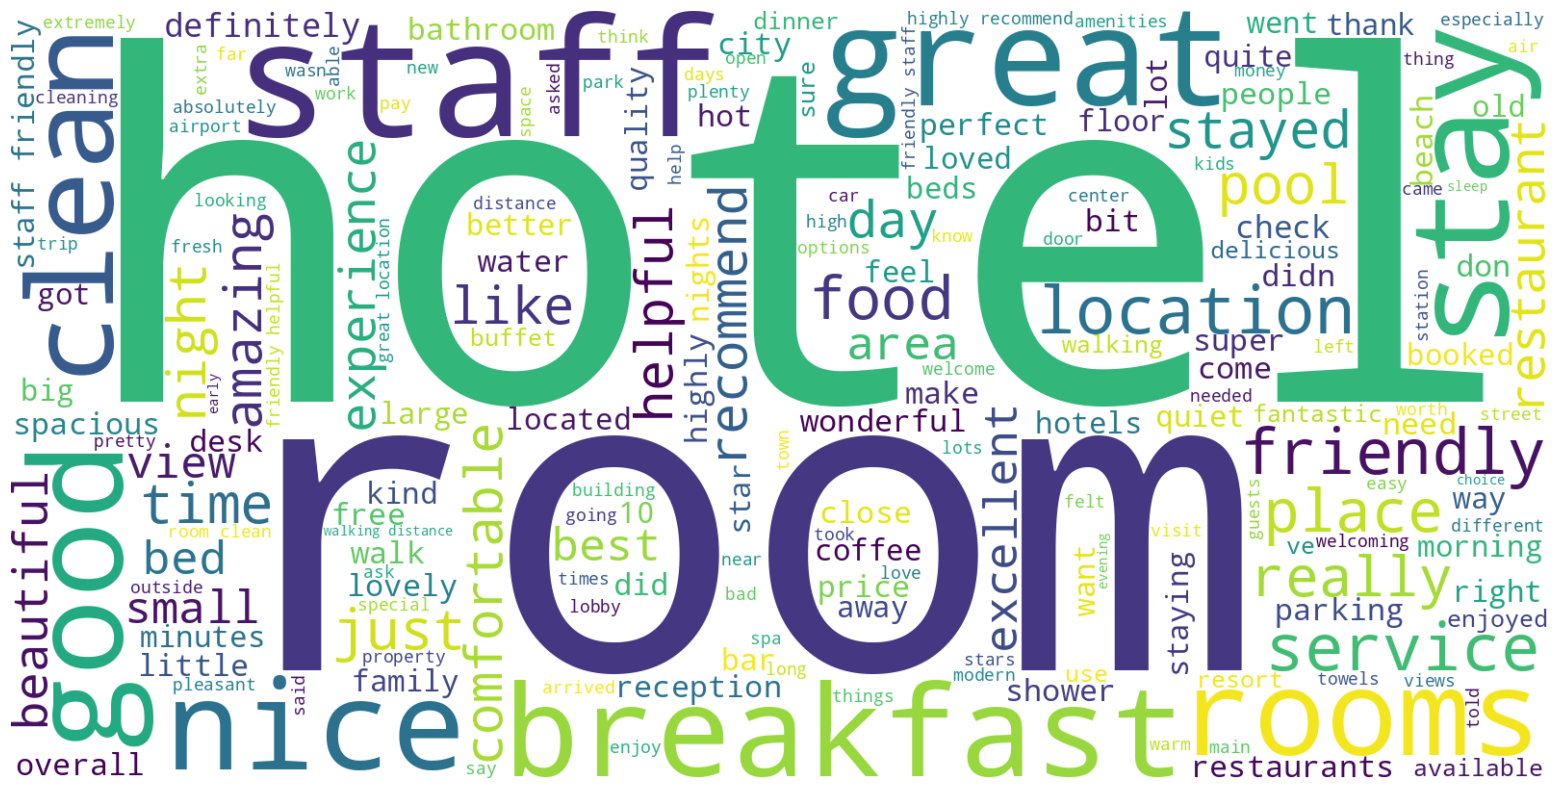

In [12]:
comments = [review['text'] for reviews in formated_df['reviews'] if reviews for review in reviews ]
ngrams_freq = get_ngrams(comments, (1,2))
show_wordcloud_of_ngrams(ngrams_freq)

In [4]:
AWS_MODEL_ID = 'mistral.mistral-7b-instruct-v0:2'
REGION = 'eu-west-3'#'us-west-2' #
llm = create_llm(REGION, AWS_MODEL_ID)

In [5]:
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser

template = """
- You are an expert in analyzing and classifying hotel information based on customer reviews. 
- Extract the following information from the reviews provided and summarize them for the hotel. 
- Provide the output in JSON format without additional notes.

Categories to extract:

Room Types: Specify the types of rooms mentioned (e.g., standard, suite, family room).
In-room Amenities: List amenities available in the rooms (e.g., wifi, minibar, air conditioning...).
Price Range: Specify the average cost per night or the general price range for rooms.
Views: Describe any notable views (e.g., ocean, city, garden).
Dining: Indicate on-site dining options, such as restaurants, cafes, bars, and room service.
Recreation: Mention facilities like a swimming pool, gym, spa, or sports facilities. This category is mandatory.
Business Facilities: Describe any business-related services like conference rooms, a business center, or meeting facilities.
Style: Describe the decor or style of the hotel (e.g., modern, rustic, traditional).
Atmosphere: Indicate the general ambiance (e.g., luxurious, family-friendly, romantic).
Proximity to Attractions: Note the distance from key attractions, business districts, airports, or public transport.
Transportation: Mention any transportation services available (e.g., shuttle, car rentals).
Events and Entertainment: Highlight any events or entertainment options at the hotel.
Family-friendly Features: Indicate whether the hotel offers family-friendly amenities (e.g., kids' club, family rooms).
Pet Policy: Specify if pets are allowed and any restrictions.
If any category is not mentioned in the reviews, respond with "Unknown."
Optional : If you find other important information put them in a summarized key as "Additional Info"

#####
Example :
Hotel description : None
Customer Reviews: The hotel was modern and luxurious, with a fantastic city view from our suite. The room had free Wi-Fi, a minibar, and great room service. The pool was amazing, and the hotel had a small gym. We paid around $150 per night, which was very reasonable. It's just a 10-minute walk from the main attractions and offers an airport shuttle.

Output:
{{
  "Room Types": ["Suite"],
  "In-room Amenities": ["Wi-Fi", "Minibar", "Room service"],
  "Price Range": "$150 per night",
  "Views": "City",
  "Dining": ["Room service"],
  "Recreation": ["Swimming pool", "Gym"],
  "Business Facilities": "Unknown",
  "Accessibility": "Unknown",
  "Style": "Modern",
  "Atmosphere": "Luxurious",
  "Proximity to Attractions": "10-minute walk from main attractions",
  "Transportation": ["Airport shuttle"],
  "Events and Entertainment": "Unknown",
  "Family-friendly Features": "Unknown",
  "Pet Policy": "Unknown"
}}
#####
Hotel description : {description}
Customer Reviews:
{reviews}

Output:"""

In [6]:
# Create the PromptTemplate object
prompt = PromptTemplate(
    input_variables=["description", "reviews"],
    template=template
)
# Set up a parser + inject instructions into the prompt template.
parser = JsonOutputParser()
prompt_output = prompt.invoke({
    "description": formated_df["editorial_summary"],
    "reviews": "\n".join([review['text'] for review in formated_df['reviews'][0]]),
})
llm.invoke(prompt_output)
answer = llm.invoke(prompt_output)
prejson = answer.split('```')[1] if '```' in answer else answer
parser.invoke(prejson.replace('json',''))

{'Room Types': 'Unknown',
 'In-room Amenities': 'Unknown',
 'Price Range': 'Unknown',
 'Views': 'Unknown',
 'Dining': {'On-site': [{'Name': 'Buffet',
    'Description': 'Continental breakfast',
    'Cost': '$14 per adult'}],
  'Room Service': 'Unknown'},
 'Recreation': {'Swimming Pool': 'Unknown',
  'Gym': 'Unknown',
  'Hot Tub': 'Broken'},
 'Business Facilities': 'Unknown',
 'Style': 'Unknown',
 'Atmosphere': 'Unknown',
 'Proximity to Attractions': 'Unknown',
 'Transportation': 'Unknown',
 'Events and Entertainment': 'Unknown',
 'Family-friendly Features': 'Unknown',
 'Pet Policy': 'Unknown',
 'Additional Info': {'Location to Airport': 'Perfect',
  'Staff': ['Rude'],
  'Power Outages': 'Occur',
  'Breakfast': {'Included': 'Unknown', 'Cost': 'Unknown'},
  'Upgrades': 'Not Always Available',
  'Late Checkout': 'Not Always Possible',
  'Diamond Elite Membership': 'Not Always Recognized'}}

In [7]:
raw_input_output = {}

In [9]:
enriched_content = {}
for i, row in formated_df[:100].iterrows():
    try:
        print(i)
        if row['reviews']:
            prompt_input = prompt.invoke({
                "description": row["editorial_summary"] if row["editorial_summary"] else "",
                "reviews": "\n".join([review['text'] for review in row['reviews']])
            })
            raw_input_output[row['vendor_id']] = {'input': prompt_input.text}
            
            output = llm.invoke(prompt_input)
            raw_input_output[row['vendor_id']]['output'] = output
            
            prejson = output.split('```')[1].replace('json','') if '```' in output else output.replace('json','')
            final_json = parser.invoke(prejson)
            enriched_content[row['vendor_id']] = final_json
        else:
            enriched_content[row['vendor_id']] = {}
    except Exception as e:
        print(e)
        print(output)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [8]:
check_json_output(enriched_content)

Number of vendors treated :  99
Number of vendors without reviews (enrichment is None) :  0
Counter({'Room Types': 95, 'In-room Amenities': 95, 'Price Range': 95, 'Views': 95, 'Dining': 95, 'Recreation': 95, 'Business Facilities': 95, 'Style': 95, 'Atmosphere': 95, 'Proximity to Attractions': 95, 'Transportation': 95, 'Events and Entertainment': 95, 'Family-friendly Features': 95, 'Pet Policy': 95, 'Additional Info': 94, 'Hotel Description': 1, 'Accessibility': 1})


In [9]:
mandatory_columns =['Room Types', 'In-room Amenities', 'Price Range', 'Views', 'Dining', 'Recreation', 'Business Facilities', 'Style', 'Atmosphere', 'Proximity to Attractions',
                        'Transportation', 'Events and Entertainment', 'Family-friendly Features', 'Pet Policy']
llm_df = add_enriched_content_to_dataframe(enriched_content, mandatory_columns)
llm_df.to_csv(f"Hotels Generations/{AWS_MODEL_ID.replace('.','-')} - generated_data_100.csv",index=False)

In [10]:
full_df = pd.merge(llm_df, formated_df, on='vendor_id', how='left')
full_df.to_csv(f"Hotels Generations/{AWS_MODEL_ID.replace('.','-')} - full_data_100.csv",index=False)